In [2]:
#install kaggle
!pip install -q kaggle

In [3]:
from google.colab import files 
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mostafaebrahiem","key":"b4a0d8b45e3a81cbaba6901e389b7344"}'}

In [4]:
! mkdir ~/.kaggle

In [5]:
#copy the json file to the created directory
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets list

ref                                                             title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
akshaydattatraykhare/diabetes-dataset                           Diabetes Dataset                                  9KB  2022-10-06 08:55:25          11605        362  1.0              
whenamancodes/covid-19-coronavirus-pandemic-dataset             COVID -19 Coronavirus Pandemic Dataset           11KB  2022-09-30 04:05:11           9243        288  1.0              
stetsondone/video-game-sales-by-genre                           Video Game Sales by Genre                        12KB  2022-10-31 17:56:01            902         23  1.0              
whenamancodes/credit-card-customers-prediction                  Credit Card Cust

In [8]:
!kaggle datasets download -d coder98/emotionpain

100% 9.42G/9.42G [05:36<00:00, 35.8MB/s]
100% 9.42G/9.42G [05:36<00:00, 30.0MB/s]


In [9]:
!unzip emotionpain.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/Images/115-jy115/jy115t2aeaff/jy115t2aeaff188.png  
  inflating: images/Images/115-jy115/jy115t2aeaff/jy115t2aeaff189.png  
  inflating: images/Images/115-jy115/jy115t2aeaff/jy115t2aeaff190.png  
  inflating: images/Images/115-jy115/jy115t2aeaff/jy115t2aeaff191.png  
  inflating: images/Images/115-jy115/jy115t2aeaff/jy115t2aeaff192.png  
  inflating: images/Images/115-jy115/jy115t2aeaff/jy115t2aeaff193.png  
  inflating: images/Images/115-jy115/jy115t2aeaff/jy115t2aeaff194.png  
  inflating: images/Images/115-jy115/jy115t2aeaff/jy115t2aeaff195.png  
  inflating: images/Images/115-jy115/jy115t2aeaff/jy115t2aeaff196.png  
  inflating: images/Images/115-jy115/jy115t2aeaff/jy115t2aeaff197.png  
  inflating: images/Images/115-jy115/jy115t2aeaff/jy115t2aeaff198.png  
  inflating: images/Images/115-jy115/jy115t2aeaff/jy115t2aeaff199.png  
  inflating: images/Images/115-jy115/jy115t2aeaff/jy115t2aeaff200.png  
  inflating: 

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
pip install tflearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 107 kB 14.0 MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127299 sha256=42a544b0e7ab41ad3c77d76cc9648dac605a5d5fa34b00f67ce7b5046882f1e3
  Stored in directory: /root/.cache/pip/wheels/5f/14/2e/1d8e28cc47a5a931a2fb82438c9e37ef9246cc6a3774520271
Successfully built tflearn


In [2]:
import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm
from tensorflow.python.framework import ops
import csv
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Conv2D,MaxPooling2D
import matplotlib.pyplot as plt

from tensorboard.backend.event_processing import event_accumulator
from tflearn.layers.conv import  conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
from pickle import dump
from pickle import load
from sklearn.model_selection import train_test_split
import tflearn
from keras import applications
import keras as ks
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense,BatchNormalization
from tflearn.utils import string
import pickle as pk



Instructions for updating:
non-resource variables are not supported in the long term


**creating the pkl data file**

In [14]:
def create_train_data(TRAIN_DIR,Label_Dir,IMG_SIZE):
    training_data = []
    label_data=[]

    c0=0
    c1=0
    res=0
    #reading label only 
    for folder in os.listdir(Label_Dir):
        c0=0
        for inner_folder in os.listdir((Label_Dir+'/'+folder)):
            path = os.path.join(Label_Dir,folder+'/'+ inner_folder)
            for file in os.listdir(path):
                
                file=os.path.join(path+'/'+file)
                with open(file) as f:
                    lines = f.readlines()
                    if (lines[0][3]=='0' and c0<340):
                      label_data.append('0')
                      res+=1
                      c0+=1
                    if(lines[0][3]!='0'):
                      label_data.append('1')
                      c1+=1
                    f.close()
    
    label_data.append('-1')
    print(str(res) + ' ' + str(c1))
    #reading images and it's labels
    c=0
    c0=0
    c1=0
    res=0
    print(len(label_data))
    for folder in os.listdir(TRAIN_DIR):
        c0=0
        for inner_folder in os.listdir((TRAIN_DIR+'/'+folder)):
            path = os.path.join(TRAIN_DIR,folder+'/'+ inner_folder)
            for img in tqdm(os.listdir(path)):
                img=os.path.join(path+'/'+img)
                img_data = cv2.imread(img,cv2.IMREAD_COLOR)#cv2.IMREAD_COLOR
                img_data = cv2.resize(img_data, (IMG_SIZE, IMG_SIZE))
                img_data = cv2.cvtColor(img_data,cv2.COLOR_RGB2BGR)
                if (label_data[c]=='-1'):break
                if (label_data[c]=='0' and c0<340):
                  training_data.append([np.array(img_data), label_data[c]])
                  c0+=1
                  res+=1
                  c+=1
                if (label_data[c]!='0'):
                  training_data.append([np.array(img_data), label_data[c]])
                  c+=1
                  c1+=1
            #print(str(res) + ' ' + str(c1))      

    print(str(res) + ' ' + str(c1))           

    shuffle(training_data) 
    dump(training_data, open('/content/drive/MyDrive/saves/training_data.pkl', 'wb'))
    return training_data

**Auto tune or transfer learning code**

In [1]:
def Train(ImgSize):
  if (os.path.exists('/content/drive/MyDrive/saves/training_data.pkl')):
    training_data = load(open('/content/drive/MyDrive/saves/training_data.pkl', 'rb'))

  train = training_data
  X_train = np.array([i[0] for i in train]).reshape(-1, ImgSize, ImgSize, 3)
  y_train = [i[1] for i in train]

  X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train, test_size=0.20, random_state=42)
  y_train_one_hot = to_categorical(y_train1)
  y_test_one_hot = to_categorical(y_test1)


  tune_model = applications.vgg16.VGG16(weights='imagenet', include_top=False,input_shape=(ImgSize, ImgSize, 3))
  model = Sequential()

  for layer in tune_model.layers:
    model.add(layer)

  for layer in model.layers:
    layer.trainable = False

  # model.add(conv_2d(256,3, 3, padding="same",activation='relu'))
  # model.add(conv_2d(512,3, 3, padding="same",activation='relu'))
  # model.add(MaxPooling2D(pool_size=(3, 3)))
  model.add(Flatten())
  model.add(Dense(512,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.4))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(2,activation='softmax'))

  model.summary()

  model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
  
  print(len(y_train_one_hot))
  print(np.shape(y_train_one_hot))
  print(len(y_test_one_hot)) 
  print(np.shape(y_test_one_hot))

  history=model.fit(X_train1, y_train_one_hot, epochs=13, validation_data = (X_test1, y_test_one_hot))
  #pk.dump(model, open("/content/drive/MyDrive/saves/res_model", 'wb'))
  model.save("/content/drive/MyDrive/saves/res_model.h5")
   
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(loss) + 1)
  plt.plot(epochs, loss, 'y', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()


  acc = history.history['acc']
  val_acc = history.history['val_acc']
  plt.plot(epochs, acc, 'y', label='Training acc')
  plt.plot(epochs, val_acc, 'r', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()



**Testing**

In [ ]:
from tensorflow.python.ops.math_ops import arg_max
def test(IMG_SIZE):
  model=tf.keras.models.load_model("/content/drive/MyDrive/saves/res_model.h5")
  img=cv2.imread("/content/3.webp", cv2.IMREAD_COLOR)
  img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
  test = np.array(img).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
  prediction=model.predict(test)
  print(prediction)
  print(np.argmax(prediction[0]))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 250, 250, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 250, 250, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 125, 125, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 125, 125, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 125, 125, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 62, 62, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 62, 62, 256)       2

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


13472/13472 [==============================] - 127s 9ms/sample - loss: 3.8421 - acc: 0.6350 - val_loss: 0.5211 - val_acc: 0.7640
Epoch 2/13
13472/13472 [==============================] - 115s 9ms/sample - loss: 0.5890 - acc: 0.7265 - val_loss: 0.4449 - val_acc: 0.8165
Epoch 3/13
13472/13472 [==============================] - 115s 9ms/sample - loss: 0.4822 - acc: 0.7615 - val_loss: 0.3763 - val_acc: 0.8299
Epoch 4/13
13472/13472 [==============================] - 115s 9ms/sample - loss: 0.4328 - acc: 0.7838 - val_loss: 0.3938 - val_acc: 0.8367
Epoch 5/13
13472/13472 [==============================] - 115s 9ms/sample - loss: 0.4247 - acc: 0.7844 - val_loss: 0.3732 - val_acc: 0.8290
Epoch 6/13
13472/13472 [==============================] - 115s 9ms/sample - loss: 0.4137 - acc: 0.7903 - val_loss: 0.3627 - val_acc: 0.8162
Epoch 7/13
13472/13472 [==============================] - 115s 9ms/sample - loss: 0.4114 - acc: 0.7847 - val_loss: 0.3790 - val_acc: 0.8275
Epoch 8/13
13472/13472 [=======

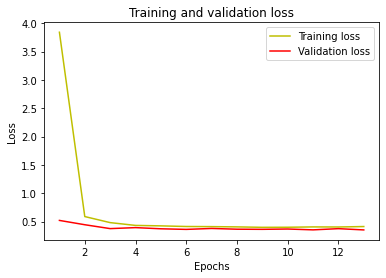

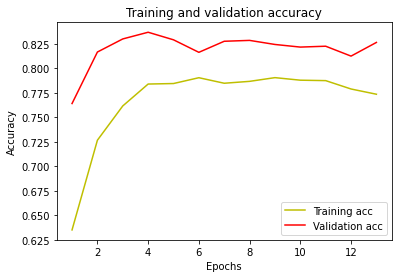

In [3]:
#train_data=create_train_data('/content/Images/Images','/content/Frame_Labels/Frame_Labels/PSPI',250)
Train(250)
#test(200)